In [1]:
from __future__ import print_function
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
#from keras.optimizers import SGD
from tensorflow.keras.optimizers import SGD
from keras.utils import np_utils
#from keras.optimizers import RMSprop
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import pandas as pd

#### 1. Using MNIST Dataset

In [2]:
np.random.seed(1671) # for reproducibility
# network and training
NB_EPOCH = 200
BATCH_SIZE = 128
VERBOSE = 0
NB_CLASSES = 10 # number of outputs = number of digits
OPTIMIZER = SGD()
N_HIDDEN = 128
VALIDATION_SPLIT=0.2 # how much TRAIN is reserved for VALIDATION
# data: shuffled and split between train and test sets
#
(X_train, y_train), (X_test, y_test) = mnist.load_data()
#X_train is 60000 rows of 28x28 values --> reshaped in 60000 x 784
RESHAPED = 784
#
X_train = X_train.reshape(60000, RESHAPED)
X_test = X_test.reshape(10000, RESHAPED)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# normalize
#
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')
# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES)
# 10 outputs
# final stage is softmax
model = Sequential()
model.add(Dense(NB_CLASSES, input_shape=(RESHAPED,)))
model.add(Activation('softmax'))
model.summary()
model.compile(loss='categorical_crossentropy',optimizer=OPTIMIZER, metrics=['accuracy'])
history = model.fit(X_train, Y_train,
batch_size=BATCH_SIZE, epochs=NB_EPOCH,
verbose=VERBOSE, validation_split=VALIDATION_SPLIT)
score = model.evaluate(X_test,Y_test, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

60000 train samples
10000 test samples
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                7850      
                                                                 
 activation (Activation)     (None, 10)                0         
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________

Test score: 0.2774687707424164
Test accuracy: 0.9222999811172485


### 2. Using Ionosphere dataset
#### Data was collected from radars which consists of high-frequency antennas to find free electrons in the ionosphere. "Good" radar returns are those showing evidence of some type of structure in the ionosphere and are denoted by 'g'.  "Bad" returns, denoted by 'b' in the dataset, are those that do not let their signals pass through the ionosphere.
There are 35 attributes in total, with the last attribute denoting if the radar return is good or bad.

In [3]:
data = pd.read_csv("ionosphere.data")
#Changing categorical to numeric data
data.iloc[:,-1].replace(['b', 'g'], [0, 1], inplace=True)

In [4]:
from sklearn.model_selection import train_test_split
X = pd.DataFrame(data.iloc[:,:-1])
y =data.iloc[:,-1]
X_train, X_test, Y_train, Y_test = train_test_split(X,y,random_state=1,test_size=0.2)

#### i) Using standard hyperparameters

280 train samples
70 test samples
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 128)               4480      
                                                                 
 activation_1 (Activation)   (None, 128)               0         
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 activation_2 (Activation)   (None, 128)               0         
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)    

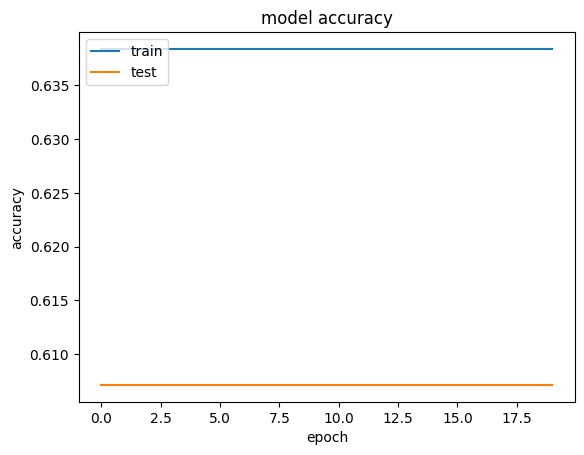

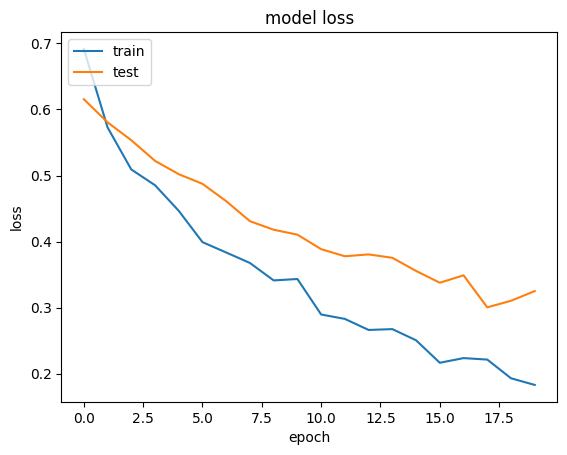

In [5]:
np.random.seed(1671) 
NB_EPOCH = 20
BATCH_SIZE = 128
VERBOSE = 0
OPTIMIZER = RMSprop()
N_HIDDEN = 128
VALIDATION_SPLIT=0.2 # how much TRAIN is reserved for VALIDATION
DROPOUT = 0.3
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')
Y_train = np.asarray(Y_train).reshape((-1,1))
Y_test = np.asarray(Y_test).reshape((-1,1))
# M_HIDDEN hidden layers
# final stage is softmax
model = Sequential()
model.add(Dense(N_HIDDEN, input_shape=(34,)))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))
model.add(Dense(N_HIDDEN))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))
model.add(Dense(1))
model.add(Activation('softmax'))
model.summary()
model.compile(loss='binary_crossentropy',optimizer=OPTIMIZER,metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE, epochs=NB_EPOCH, verbose=VERBOSE, validation_split=VALIDATION_SPLIT)
score = model.evaluate(X_test, Y_test, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#### ii) Changing the activation function of final layer to sigmoid, epoch size to 10 and batch size to 100

280 train samples
70 test samples
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               4480      
                                                                 
 activation_4 (Activation)   (None, 128)               0         
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 128)               16512     
                                                                 
 activation_5 (Activation)   (None, 128)               0         
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_6 (Dense)    

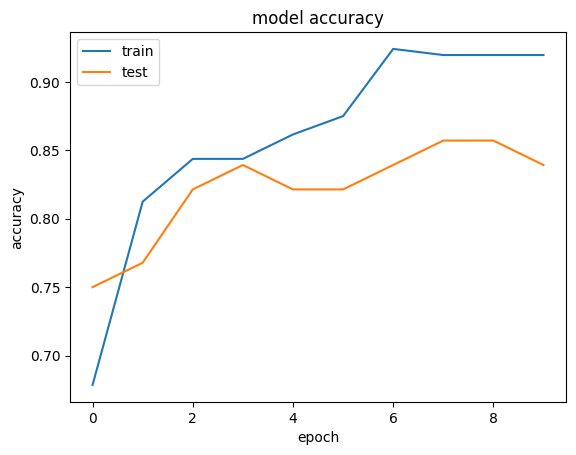

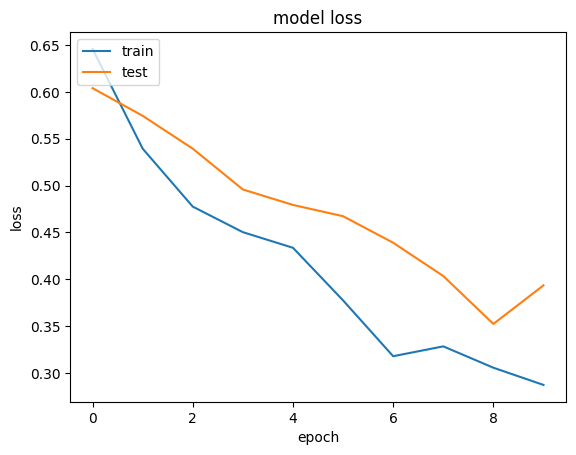

In [6]:
np.random.seed(1671) 
NB_EPOCH = 10
BATCH_SIZE = 100
VERBOSE = 0
OPTIMIZER = RMSprop()
N_HIDDEN = 128
VALIDATION_SPLIT=0.2 # how much TRAIN is reserved for VALIDATION
DROPOUT = 0.3
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')
Y_train = np.asarray(Y_train).reshape((-1,1))
Y_test = np.asarray(Y_test).reshape((-1,1))
# M_HIDDEN hidden layers
# final stage is softmax
model = Sequential()
model.add(Dense(N_HIDDEN, input_shape=(34,)))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))
model.add(Dense(N_HIDDEN))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.summary()
model.compile(loss='binary_crossentropy',optimizer=OPTIMIZER,metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE, epochs=NB_EPOCH, verbose=VERBOSE, validation_split=VALIDATION_SPLIT)
score = model.evaluate(X_test, Y_test, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### It can be seen that the accuracy has improved from approximately 67% to 93% 

#### iii) Changing epoch size to 40, batch size to 200 and number of hidden layers to 75

280 train samples
70 test samples
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 75)                2625      
                                                                 
 activation_7 (Activation)   (None, 75)                0         
                                                                 
 dropout_4 (Dropout)         (None, 75)                0         
                                                                 
 dense_8 (Dense)             (None, 75)                5700      
                                                                 
 activation_8 (Activation)   (None, 75)                0         
                                                                 
 dropout_5 (Dropout)         (None, 75)                0         
                                                                 
 dense_9 (Dense)    

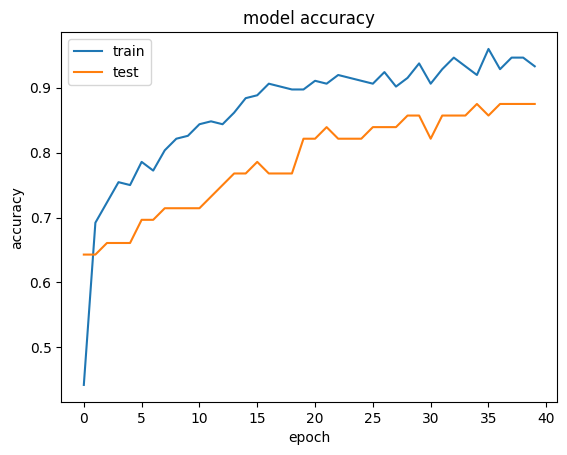

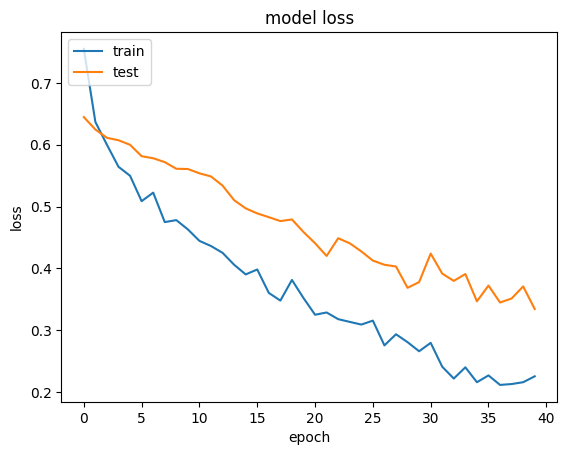

In [7]:
np.random.seed(1671) 
NB_EPOCH = 40
BATCH_SIZE = 200
VERBOSE = 0
OPTIMIZER = RMSprop()
N_HIDDEN = 75
VALIDATION_SPLIT=0.2 # how much TRAIN is reserved for VALIDATION
DROPOUT = 0.3
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')
Y_train = np.asarray(Y_train).reshape((-1,1))
Y_test = np.asarray(Y_test).reshape((-1,1))
# M_HIDDEN hidden layers
# final stage is softmax
model = Sequential()
model.add(Dense(N_HIDDEN, input_shape=(34,)))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))
model.add(Dense(N_HIDDEN))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.summary()
model.compile(loss='binary_crossentropy',optimizer=OPTIMIZER,metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE, epochs=NB_EPOCH, verbose=VERBOSE, validation_split=VALIDATION_SPLIT)
score = model.evaluate(X_test, Y_test, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### The accuracy has gone up again to almost 96%

#### iv) Changing epoch size to 50 and batch size to 150

280 train samples
70 test samples
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 75)                2625      
                                                                 
 activation_10 (Activation)  (None, 75)                0         
                                                                 
 dropout_6 (Dropout)         (None, 75)                0         
                                                                 
 dense_11 (Dense)            (None, 75)                5700      
                                                                 
 activation_11 (Activation)  (None, 75)                0         
                                                                 
 dropout_7 (Dropout)         (None, 75)                0         
                                                                 
 dense_12 (Dense)   

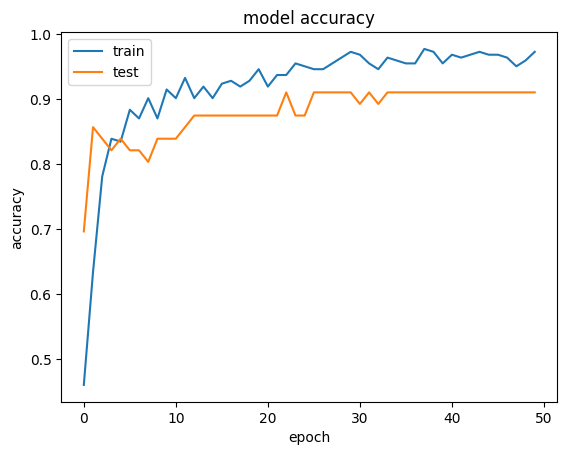

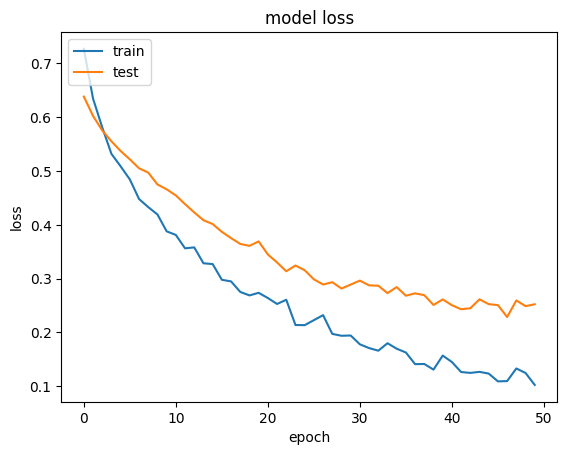

In [8]:
np.random.seed(1671) 
NB_EPOCH = 50
BATCH_SIZE = 150
VERBOSE = 0
OPTIMIZER = RMSprop()
N_HIDDEN = 75
VALIDATION_SPLIT=0.2 # how much TRAIN is reserved for VALIDATION
DROPOUT = 0.3
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')
Y_train = np.asarray(Y_train).reshape((-1,1))
Y_test = np.asarray(Y_test).reshape((-1,1))
# M_HIDDEN hidden layers
# final stage is softmax
model = Sequential()
model.add(Dense(N_HIDDEN, input_shape=(34,)))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))
model.add(Dense(N_HIDDEN))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.summary()
model.compile(loss='binary_crossentropy',optimizer=OPTIMIZER,metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE, epochs=NB_EPOCH, verbose=VERBOSE, validation_split=VALIDATION_SPLIT)
score = model.evaluate(X_test, Y_test, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### The accuracy has reduced a bit to 94%. Thus, epoch size 40 and batch size 200 is more appropriate

#### v) Changing optimizer to SGD( Gradient Descent Algorithm )

280 train samples
70 test samples
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 75)                2625      
                                                                 
 activation_13 (Activation)  (None, 75)                0         
                                                                 
 dropout_8 (Dropout)         (None, 75)                0         
                                                                 
 dense_14 (Dense)            (None, 75)                5700      
                                                                 
 activation_14 (Activation)  (None, 75)                0         
                                                                 
 dropout_9 (Dropout)         (None, 75)                0         
                                                                 
 dense_15 (Dense)   

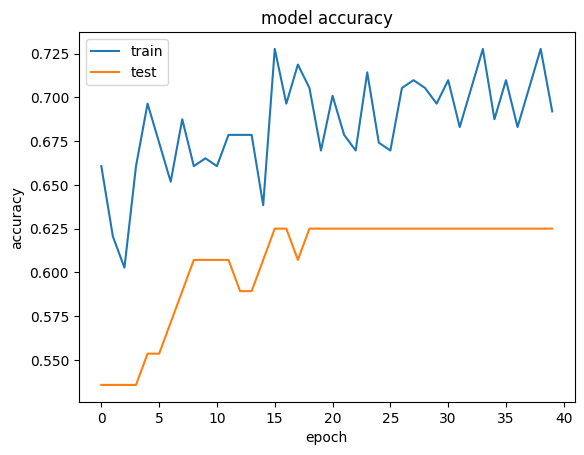

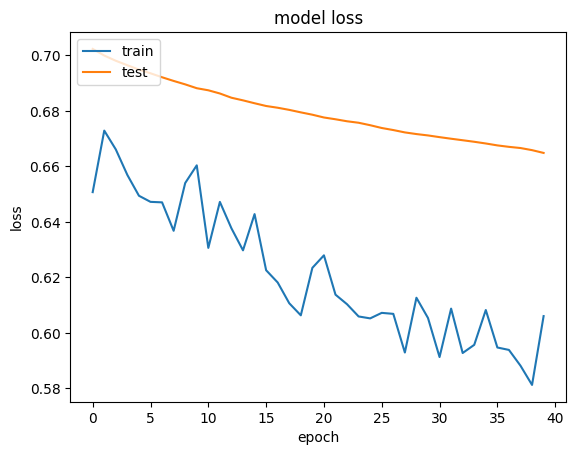

In [9]:
np.random.seed(1671) 
NB_EPOCH = 40
BATCH_SIZE = 200
VERBOSE = 0
OPTIMIZER = SGD()
N_HIDDEN = 75
VALIDATION_SPLIT=0.2 # how much TRAIN is reserved for VALIDATION
DROPOUT = 0.3
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')
Y_train = np.asarray(Y_train).reshape((-1,1))
Y_test = np.asarray(Y_test).reshape((-1,1))
# M_HIDDEN hidden layers
# final stage is softmax
model = Sequential()
model.add(Dense(N_HIDDEN, input_shape=(34,)))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))
model.add(Dense(N_HIDDEN))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.summary()
model.compile(loss='binary_crossentropy',optimizer=OPTIMIZER,metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE, epochs=NB_EPOCH, verbose=VERBOSE, validation_split=VALIDATION_SPLIT)
score = model.evaluate(X_test, Y_test, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### The optimizer has performed poorly bringing down the accuracy to 72%. Hence it is not suitable for this dataset

## Thus, after fine tuning the hyper parameters, the best yielding performance is with the sigmoid function as the activation function for the last layer. The best optimizer is RMSprop algorithm. The ideal epoch size is 40 and batch size 200. Number of hidden layers is 75.